In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('.//data_models/heart_disease_uci.csv')

In [7]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Limpieza inicial

In [9]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

porcentaje de limpieza:

numero maravilloso -> 3.5%
df de mas de 200 registros y 6 variables -> menos de 10% esta ok

In [10]:
# Limpieza (a cuchillo) de los valores nulos
df_var = df.isnull().sum()
por = 10/100
df_var = df_var[df_var < por * len(df)]
list_var_OK = df_var.index
df = df[list_var_OK]

In [11]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 93.6+ KB


In [13]:
df.dropna(inplace=True) # Quitar los valores NaN 
df.isnull().sum() # Verificar que se han quitado los valores NaN (tiene que salir todo ceros)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,740.0,406.598649,259.907071,1.0,185.75,377.5,588.25,920.0
age,740.0,53.097297,9.408127,28.0,46.00,54.0,60.00,77.0
trestbps,740.0,132.754054,18.581250,0.0,120.00,130.0,140.00,200.0
chol,740.0,220.136486,93.614555,0.0,197.00,231.0,271.00,603.0
thalch,740.0,138.744595,25.846082,60.0,120.00,140.0,159.25,202.0
oldpeak,740.0,0.894324,1.087160,-1.0,0.00,0.5,1.50,6.2
num,740.0,0.924324,1.128882,0.0,0.00,1.0,1.00,4.0


<Axes: xlabel='num', ylabel='count'>

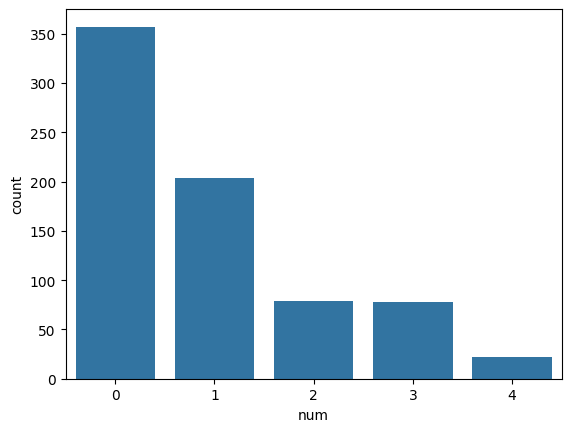

In [15]:
sns.countplot(x='num', data=df)

Las matrices de correlacion solo se pueden hacer con variables numericas, usar la logica. Pensar que a veces hay variables categoricas expresadas como numeros.
Lo mismo pasa con el heatmap

In [16]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Male'

In [ ]:
df.corr()['target'].sort_values()

ValueError: could not convert string to float: 'Male'

<Axes: xlabel='num', ylabel='cp'>

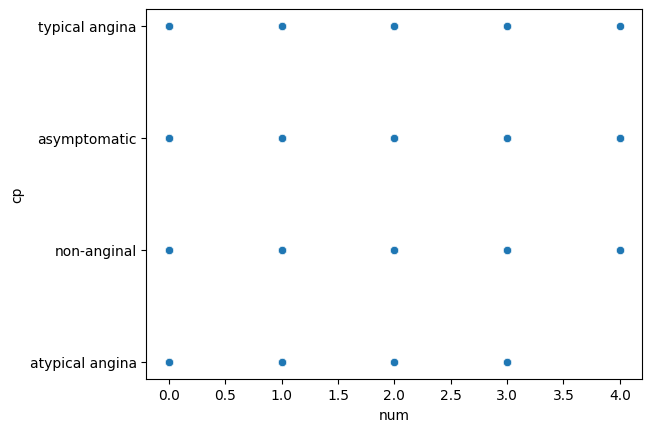

In [ ]:
sns.scatterplot(x='num', y='cp', data=df)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

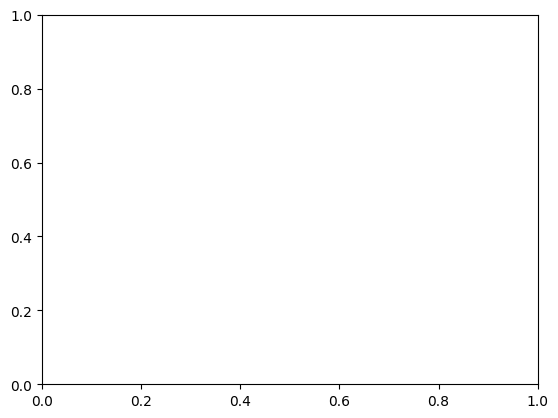

In [ ]:
plt.hist2d(df['sex'], df['num'], bins=(2,2), cmap= plt.cm.viridis)
plt.xlabel('sex')
plt.ylabel('target')
plt.colorbar()

In [7]:
x, y = df.drop('num', axis=1).values, df['num'].values

## Train test

Train test: usamos una parte de los datos, por ejemplo 70/30. 70% para el train y 30% para el test. de esta manera podemos entrenad un modelo y testear si es bueno con el 30% restante del dataset y de aqui sacar el % de accuracy. 

La segmentacion se hace aleatoria. El train test se hace con los datos ya procesados

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 17071986)  # El random state es el numero semilla, evitar numeros 'bonitos'

In [9]:
x_train

array([[516, 50, 'Female', ..., nan, nan, 'reversable defect'],
       [824, 63, 'Male', ..., 'upsloping', nan, nan],
       [679, 60, 'Male', ..., 'flat', nan, 'reversable defect'],
       ...,
       [383, 46, 'Male', ..., nan, nan, nan],
       [837, 55, 'Male', ..., nan, nan, nan],
       [473, 56, 'Male', ..., 'upsloping', nan, 'fixed defect']],
      dtype=object)

In [17]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

ValueError: could not convert string to float: 'Female'

### Modelos de redes neuronales

In [16]:
import tensorflow as tf

ModuleNotFoundError: No module named 'distutils'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()

Cantidad de neuronas normalmente se hace de mas a menos (en forma de embudo), para acabar con 1 sola neurona

In [ ]:
num_neuronas = x_train.shape[1]
model.add(Dense(13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x = x_train, y = y_train, epochs= 300, validation_data= (x_test,y_test), verbose = 1)

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# Early stopping
# Nos interesa que el modelo aprenda de manera optima, pero el aprendizaje tiene forma de curva con rendimiento decreciente, 
# por esto el early stopping para el aprendizaje de manera automatica en el momento oportuno
from tensorflow.keras.callback import EarlyStopping

num_neuronas = x_train.shape[1]
model.add(Dense(13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

earlystop = 

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# Drop out
from tensorflow.keras.layers import Dropout

num_neuronas = x_train.shape[1]
model.add(Dense(13, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Reports del modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
prediccion = model.predict_classes(x_test)

In [ ]:
classification_report(y_test,prediccion)

## Modelo bancario

#### Predecir el pago de un prestamo para poder saber si se puede conceder, el interes, etc